**Summary from Collaborator 2**

We loaded the coronary dataset, which contains 4,238 rows and 16 columns, and observed that the target variable is imbalanced, with approximately 15% positive cases. To improve clarity and avoid misunderstandings among collaborators, we renamed the variables using more descriptive names. We then removed around 500 rows containing missing values. After cleaning the data, we checked for negative values in variables where they are not physiologically plausible. Finally, we explored the presence of outliers using boxplots and interquartile range (IQR) calculations.

# Collaborator 2 – Feature Engineering & EDA

Goal: Turn raw variables into model-ready features and understand patterns.

Input:
* Cleaned DataFrame from collaborator 1

Tasks:
* Encode categorical variables (sex, smoker, binary medical variables).
* Decide whether ordinal variables (education) need special handling.
* Engineer simple derived features 
* Produce plots: CHD vs age, BP, cholesterol, BMI, glucose,...
* Check separability between CHD and non-CHD cases.

Deliverables:
* Feature-engineered DataFrame (engineered_df.csv)
* EDA plots with brief observations

In [ ]:
#load input, cleaned data
df = pd.read_csv("cleaned_data.csv")

# Biologicaly imposible values

The different variables will be checked again for impossible values. This time we do it specefically for the different values, checking boundaries found in the literature. 

| Feature              | Impossible values (living human) |
|----------------------|----------------------------------|
| age                  | ≤ 0, > 120                       |
| cigs_per_day         | < 0, > 100                       |
| total_cholesterol    | ≤ 0, > 1000                      |
| systolic_bp          | < 50 or > 300                    |
| diastolic_bp         | < 30 or > 200                    |
| bmi                  | ≤ 0, > 80                        |
| heart_rate           | < 20 or > 300                    |
| glucose              | < 20 or > 1000                   |


In [12]:
df.describe()  

,age,education_level,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,49.557440,1.979759,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,8.561133,1.022657,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


All values are biologically possible.

### Identify variable types
we checked this before but now we focus on the types for our next step.

In [13]:
print("\nDtypes:\n", df.dtypes)


Dtypes:
 sex                        object
age                         int64
education_level           float64
current_smoker             object
cigs_per_day              float64
bp_meds                   float64
prevalent_stroke            int64
prevalent_hypertension      int64
diabetes                    int64
total_cholesterol         float64
systolic_bp               float64
diastolic_bp              float64
bmi                       float64
heart_rate                float64
glucose                   float64
ten_year_chd                int64
dtype: object


We have the following variables:

Binary:
* sex, current_smoker, bp_meds, prevalent_stroke, prevalent_hypertension, diabetes, ten_year_chd

Continuous:
* age, bmi, systolic_bp, diastolic_bp, total_cholesterol, glucose, herat_rate, cigs_per_day

Ordinal:
* education_level
* this is treated as an ordinal variable and kept as an integer encoding.

Now we will adjust the type of the data, so the objects become also binary int64:

In [16]:
#change sex to binary
# Convert to string first
df["sex"] = df["sex"].astype(str)
# Replace values
df["sex"] = df["sex"].replace({"F": 0, "M": 1})
# Convert to nullable integer type (Int64) which handles NaN
df["sex"] = df["sex"].astype("Int64")#

#change current_smoker to binary
# Convert to string first
df["current_smoker"] = df["current_smoker"].astype(str)
# Replace values
df["current_smoker"] = df["current_smoker"].replace({"Yes": 1, "No": 0})
# Convert to nullable integer type (Int64) which handles NaN
df["current_smoker"] = df["current_smoker"].astype("Int64")

/var/folders/l3/nx5xrgc901b995y0b26qg11r0000gn/T/ipykernel_2365/3442929187.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["current_smoker"] = df["current_smoker"].replace({"Yes": 1, "No": 0})


In [17]:
print("\nDtypes:\n", df.dtypes)


Dtypes:
 sex                         Int64
age                         int64
education_level           float64
current_smoker              Int64
cigs_per_day              float64
bp_meds                   float64
prevalent_stroke            int64
prevalent_hypertension      int64
diabetes                    int64
total_cholesterol         float64
systolic_bp               float64
diastolic_bp              float64
bmi                       float64
heart_rate                float64
glucose                   float64
ten_year_chd                int64
dtype: object


Binary categorical variables such as sex and current_smoker were encoded as 0/1 instead of being kept as objects. Most predictive models require numeric inputs. Using a binary numeric encoding makes these variables immediately model-ready. While categorical dtypes are useful for semantics and memory efficiency, explicit numeric encoding is required for downstream modeling. Now all variable are numeric.

We check if all binary variables are binary:

In [18]:
binary_cols = [
    "sex", "current_smoker", "bp_meds",
    "prevalent_stroke", "prevalent_hypertension",
    "diabetes", "ten_year_chd"
]

df[binary_cols].nunique()


sex                       2
current_smoker            2
bp_meds                   2
prevalent_stroke          2
prevalent_hypertension    2
diabetes                  2
ten_year_chd              2
dtype: int64

### Feature engineering

We create a simple smoker intensity feature. 
This feature distinguishes non-smokers from light and heavy smokers:

In [21]:
df["smoker_intensity"] = (
    df["current_smoker"] * df["cigs_per_day"]
)
df.head()

,sex,age,education_level,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd,smoker_intensity
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,20.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,30.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,23.0


Additionally, we create he feature of pulse pressure with the systolic and diastolic BP:

In [32]:
df["pulse_pressure"] = df["systolic_bp"] - df["diastolic_bp"]
df.head()

,sex,age,education_level,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hypertension,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd,smoker_intensity,pulse_pressure
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0.0,36.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0.0,40.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,20.0,47.5
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,30.0,55.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,23.0,46.0


### Save df as engineered_df

In [ ]:
# Save the engineered DataFrame to a CSV file
df.to_csv("engineered_df.csv", index=False)

### EDA plots
First  we will plot the target variable ten_year_chd vs continuous variables:

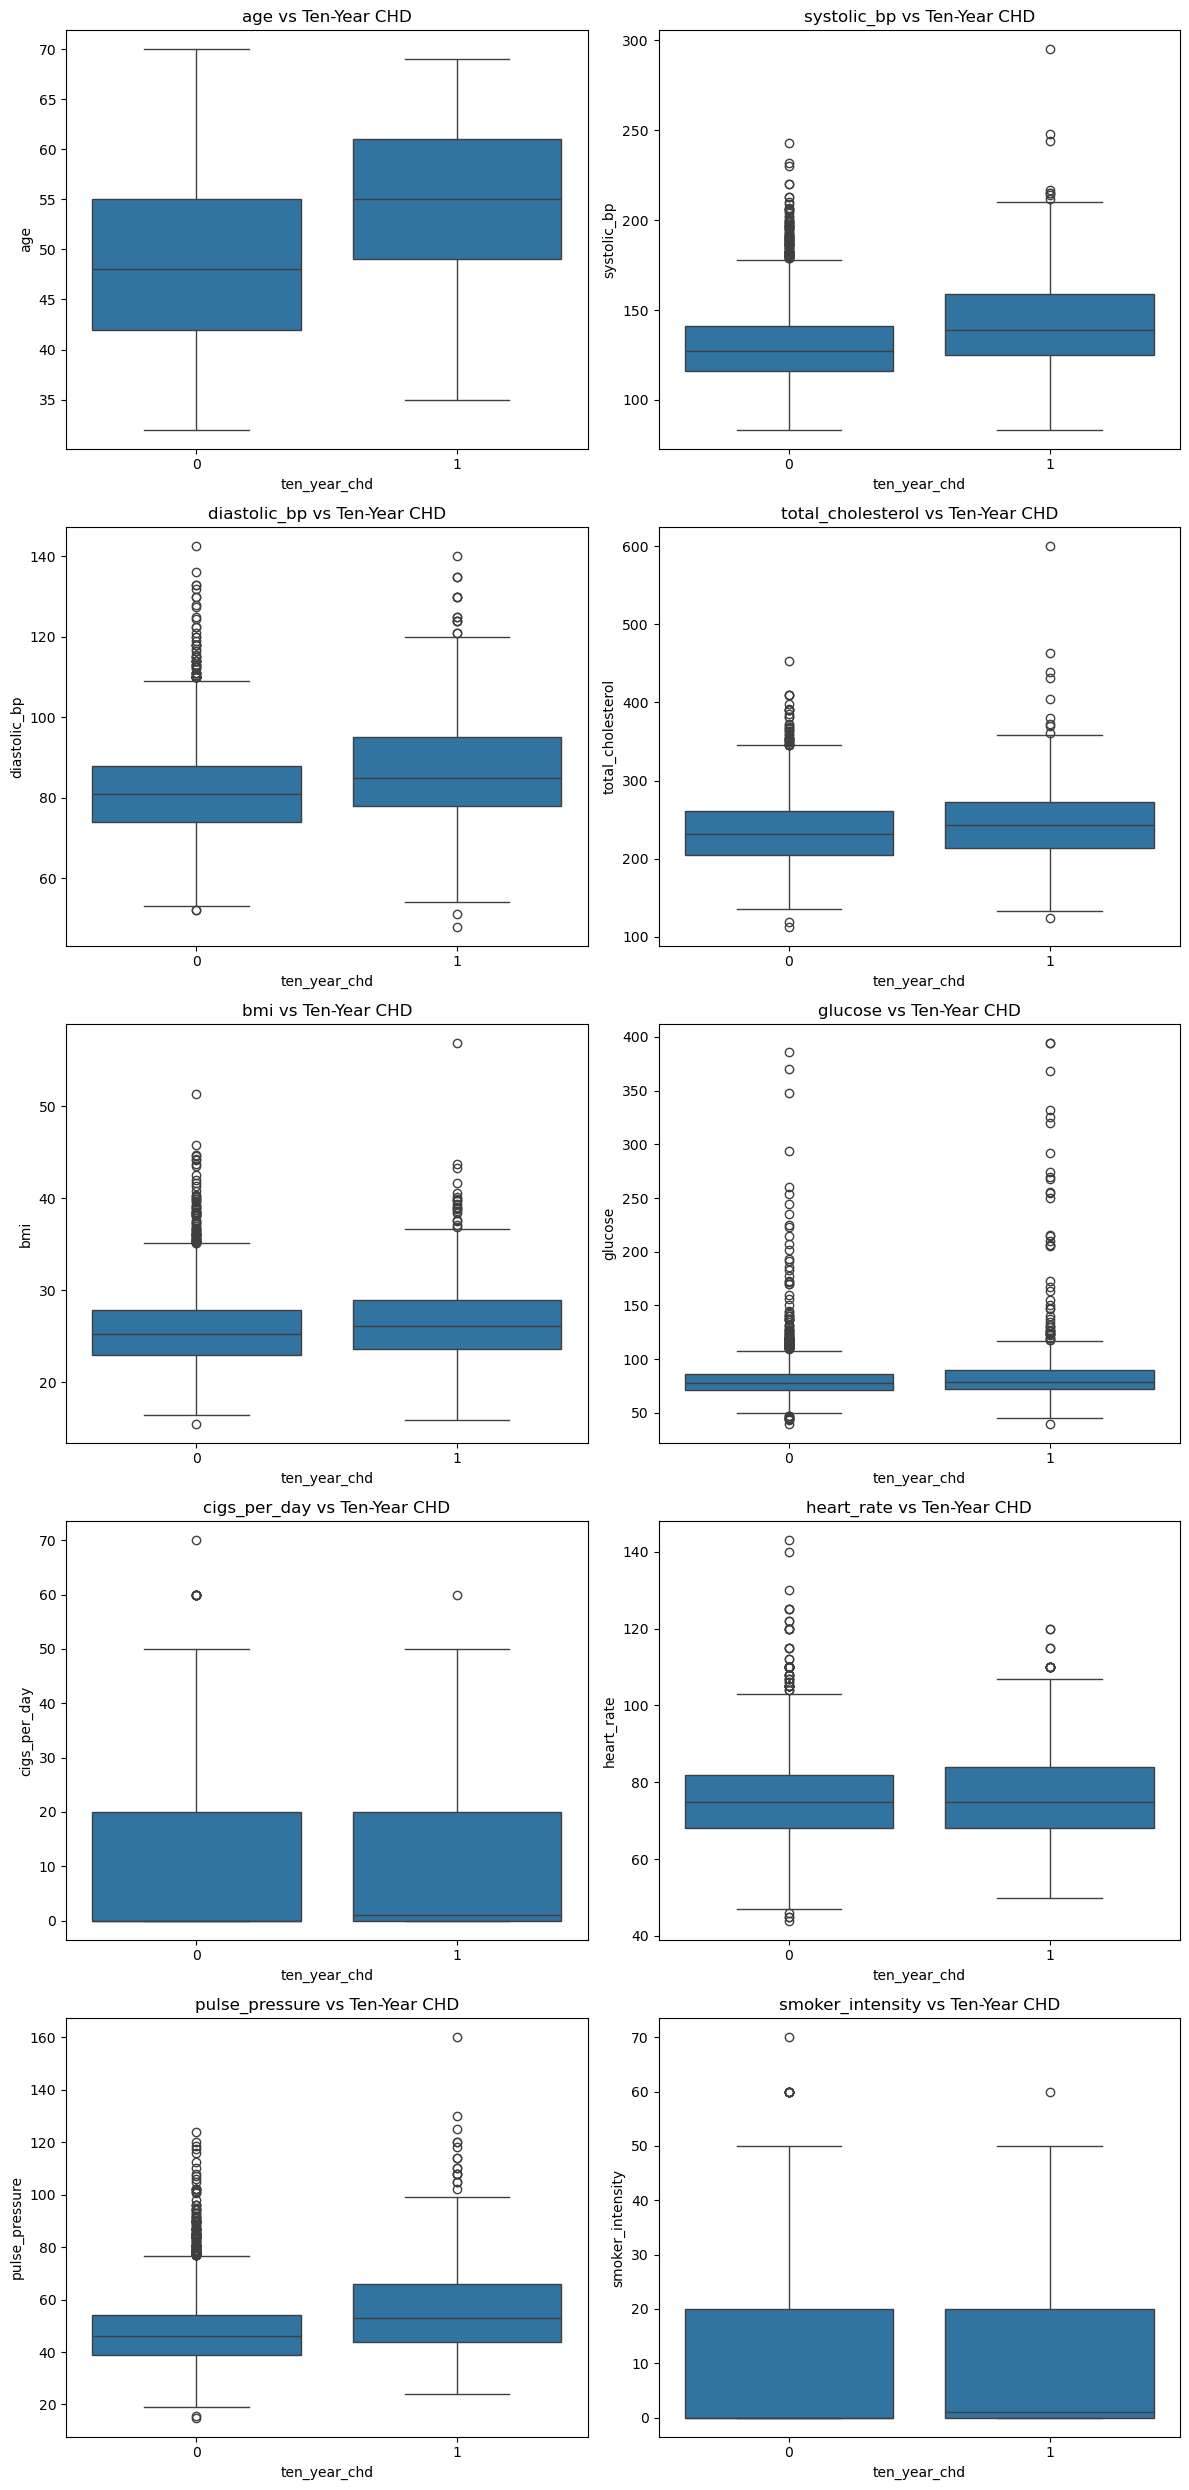

In [39]:
features = [
    "age", "systolic_bp", "diastolic_bp",
    "total_cholesterol", "bmi", "glucose", "cigs_per_day", "heart_rate",
    "pulse_pressure", "smoker_intensity"
]

# Calculate number of rows needed (3 columns, so ceil(8/3) = 3 rows)
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots: 3 columns, smaller figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5*n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for idx, col in enumerate(features):
    sns.boxplot(x="ten_year_chd", y=col, data=df, ax=axes[idx])
    axes[idx].set_title(f"{col} vs Ten-Year CHD")

# Hide unused subplots if any
for idx in range(len(features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


#### Key Observations:
Individuals who developed ten-year coronary heart disease (CHD) tend to be older than those who did not, showing a clear shift toward higher ages in the CHD group. Systolic blood pressure, diastolic blood and pulse pressure are also generally higher among CHD cases, although substantial overlap exists between groups. Body mass index (BMI) and glucose levels show slightly higher medians in the CHD group but with strong overlap, suggesting limited separability when considered individually. Total cholesterol displays only modest differences between groups, indicating weak standalone discriminatory power. Smoking intensity (cigarettes per day) and heart rate show minimal differences between CHD and non-CHD groups, suggesting a weaker univariate association with CHD status.
Overall, age and pulse, diastolic and systolic blood pressure appear to be the most informative variables in distinguishing CHD from non-CHD cases, while most other features show considerable overlap and are likely to contribute mainly in combination within multivariable models.

Now we will aslo check the binary and ordinal variables:
 

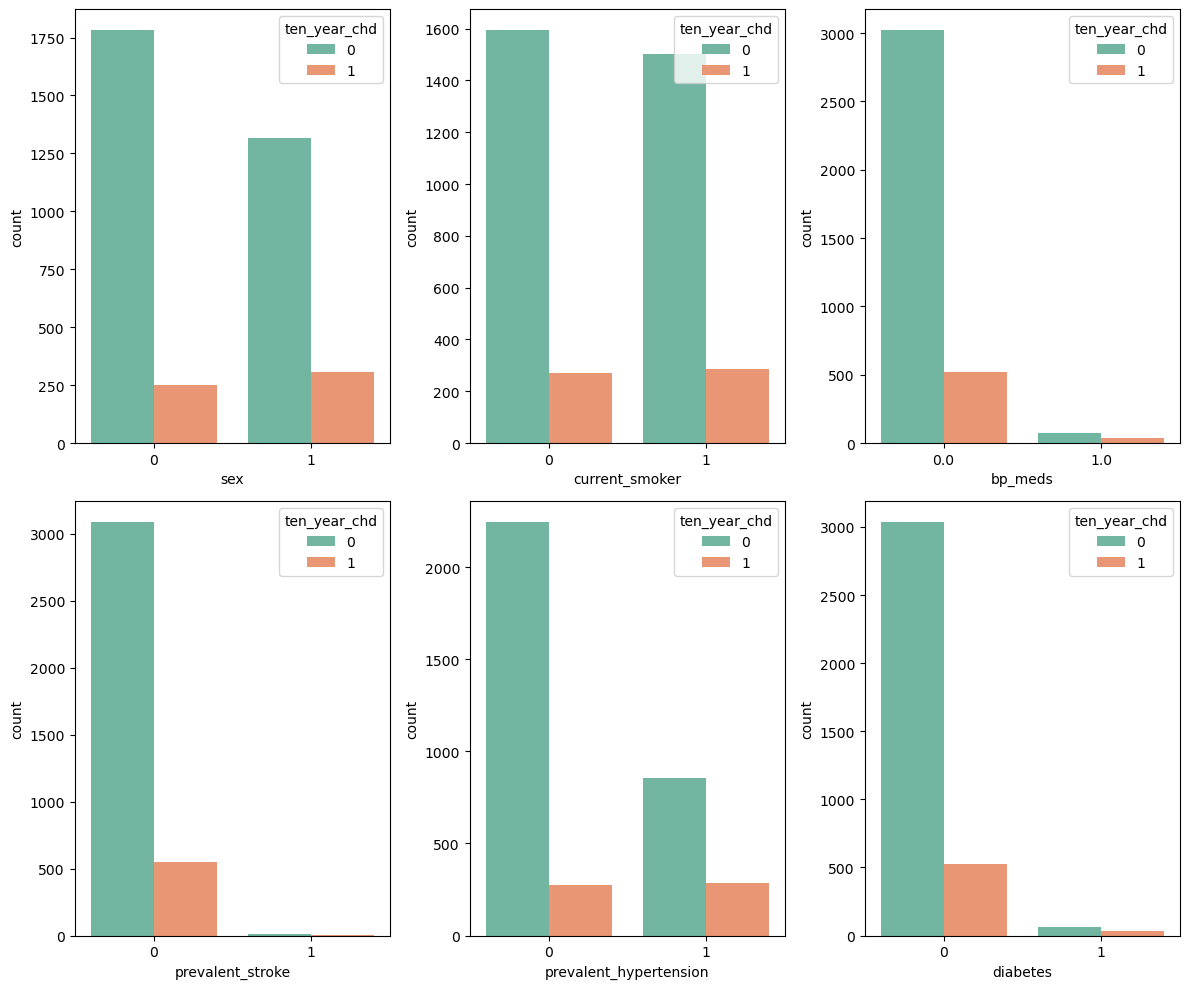

In [30]:
#binary variables
features = [
    "sex", "current_smoker", "bp_meds",
    "prevalent_stroke", "prevalent_hypertension",
    "diabetes"
]

# Calculate number of rows needed (3 columns, so ceil(8/3) = 3 rows)
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots: 3 columns, smaller figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5*n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for idx, col in enumerate(features):
    ax = axes[idx]
    order = df[col].cat.categories if hasattr(df[col], "cat") else None
    sns.countplot(data=df, x=col, hue="ten_year_chd", order=order, palette="Set2", ax=ax)

# Hide unused subplots if any
for idx in range(len(features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


#### Key observations:

Male (1) participants show a higher proportion of ten-year CHD cases compared to females (0). Current smokers (1) exhibit a slightly higher occurrence of CHD than non-smokers (0), although the difference is moderate. Individuals taking blood pressure medication (1) and those with prevalent hypertension (1) show a higher proportion in the group of CHD cases, indicating a association with cardiovascular risk. Diabetes is also associated with a higher relative frequency of CHD, despite its lower prevalence in the dataset. Prevalent stroke is rare and shows limited discriminatory power due to the small number of affected individuals.
Overall, medical history variables related to hypertension and diabetes appear more informative for CHD risk than lifestyle factors when considered individually.

### Check separability between CHD and non-CHD cases
Among the variables examined, age systolic blood pressure and pulse pressure show the strongest univariate separation between CHD and non-CHD cases. Other continuous variables such as BMI, glucose, and diastolic blood pressure exhibit weaker separation with substantial overlap, while cholesterol, smoking intensity, and heart rate provide little standalone discriminatory power. Categorical medical history variables suggest associations with CHD but do not yield clear separability on their own.

We will create 2 KDE plots to observe more details about the age and systolic BP:

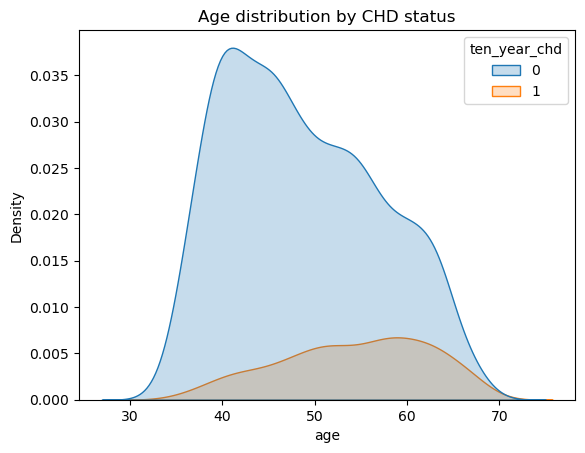

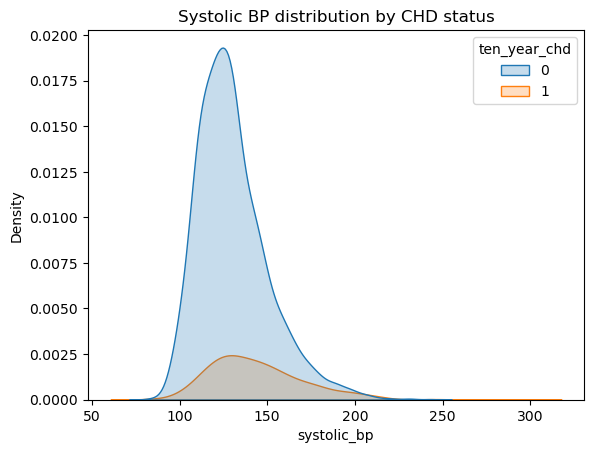

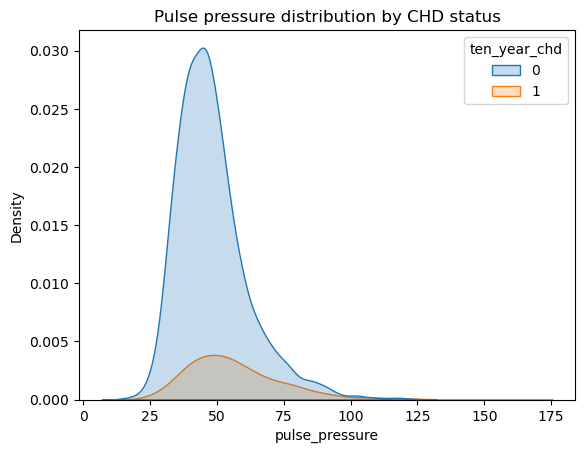

In [37]:
#KDE plot of age
sns.kdeplot(data=df, x="age", hue="ten_year_chd", fill=True)
plt.title("Age distribution by CHD status")
plt.show()

#KDE plot of systolic BP
sns.kdeplot(data=df, x="systolic_bp", hue="ten_year_chd", fill=True)
plt.title("Systolic BP distribution by CHD status")
plt.show()

#KDE plot of pulse pressure
sns.kdeplot(data=df, x="pulse_pressure", hue="ten_year_chd", fill=True)
plt.title("Pulse pressure distribution by CHD status")
plt.show()


#### Key observation:

All plots exhibit right-shifted distributions for CHD cases, indicating moderate separability; however, substantial overlap between CHD and non-CHD groups suggests that neither variable alone is sufficient for clear discrimination.

### Summary - Feature Engineering & EDA

Two derived features were created to capture clinically meaningful information beyond the raw variables. Smoker intensity was defined as the product of current smoking status and the number of cigarettes smoked per day, allowing differentiation between non-smokers, light smokers, and heavy smokers, while assigning zero exposure to non-smokers. Pulse pressure was computed as the difference between systolic and diastolic blood pressure and serves as an indicator of arterial stiffness and cardiovascular risk. These engineered features aim to incorporate interaction effects and physiological relationships that may not be fully captured by individual variables alone.

The data frame was saved as engineered_df.csv.

Exploratory data analysis was conducted to examine the relationship between baseline characteristics and ten-year coronary heart disease (CHD) status. Age, pulse pressure and systolic blood pressure show the strongest univariate associations with CHD, with distributions for CHD cases shifted toward higher values compared to non-CHD cases. However, substantial overlap remains, indicating only moderate separability when these variables are considered individually. Other continuous variables, including diastolic blood pressure, body mass index, glucose, and total cholesterol, exhibit weaker differences and considerable overlap between groups. Categorical variables such as sex, prevalent hypertension, blood pressure medication use, and diabetes suggest associations with CHD risk, although small subgroup sizes and class imbalance limit their standalone discriminatory power. Overall, no single variable clearly separates CHD from non-CHD cases, highlighting the need for multivariable modeling to capture combined effects.